In [2]:
%matplotlib widget
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.manifold import TSNE
from umap import UMAP
from trimap import TRIMAP
from pacmap import PaCMAP
from sklearn.preprocessing import (
    MaxAbsScaler,
    MinMaxScaler,
    Normalizer,
    PowerTransformer,
    QuantileTransformer,
    RobustScaler,
    StandardScaler,
    minmax_scale,
)
import json
# plt.interactive(False)

# Загрузка датасета

In [3]:
names = ['Class', 'Age', 'Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise', 'Anorexia', 'Liver Big', 'Liver Firm',
         'Spleen Palpable', 'Spiders', 'Ascites', 'Varices', 'Bilirubin', 'Alk Phosphate', 'Sgot', 'Albumin', 'Protime',
         'Histology']
with open('../config.json') as file:
    file_data = json.load(file)
hepatitis_data_path = file_data['hepatitis_data_path']
print(hepatitis_data_path)
hepatitis = pd.read_csv(hepatitis_data_path, header=None, names=names)
# hepatitis = pd.read_csv(r'D:\Artem\Magistrature\1_sem\intellg_systems_and_techno\labs\lab_3_4\datasets\hepatitis\hepatitis.data', header = None, names = names)
hepatitis.keys()

D:\Artem\Magistrature\1_sem\intellg_systems_and_techno\labs\lab_3_4\datasets\hepatitis\hepatitis.data


Index(['Class', 'Age', 'Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise',
       'Anorexia', 'Liver Big', 'Liver Firm', 'Spleen Palpable', 'Spiders',
       'Ascites', 'Varices', 'Bilirubin', 'Alk Phosphate', 'Sgot', 'Albumin',
       'Protime', 'Histology'],
      dtype='object')

In [4]:
hepatitis

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,?,242,3.3,50,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,?,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,?,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2


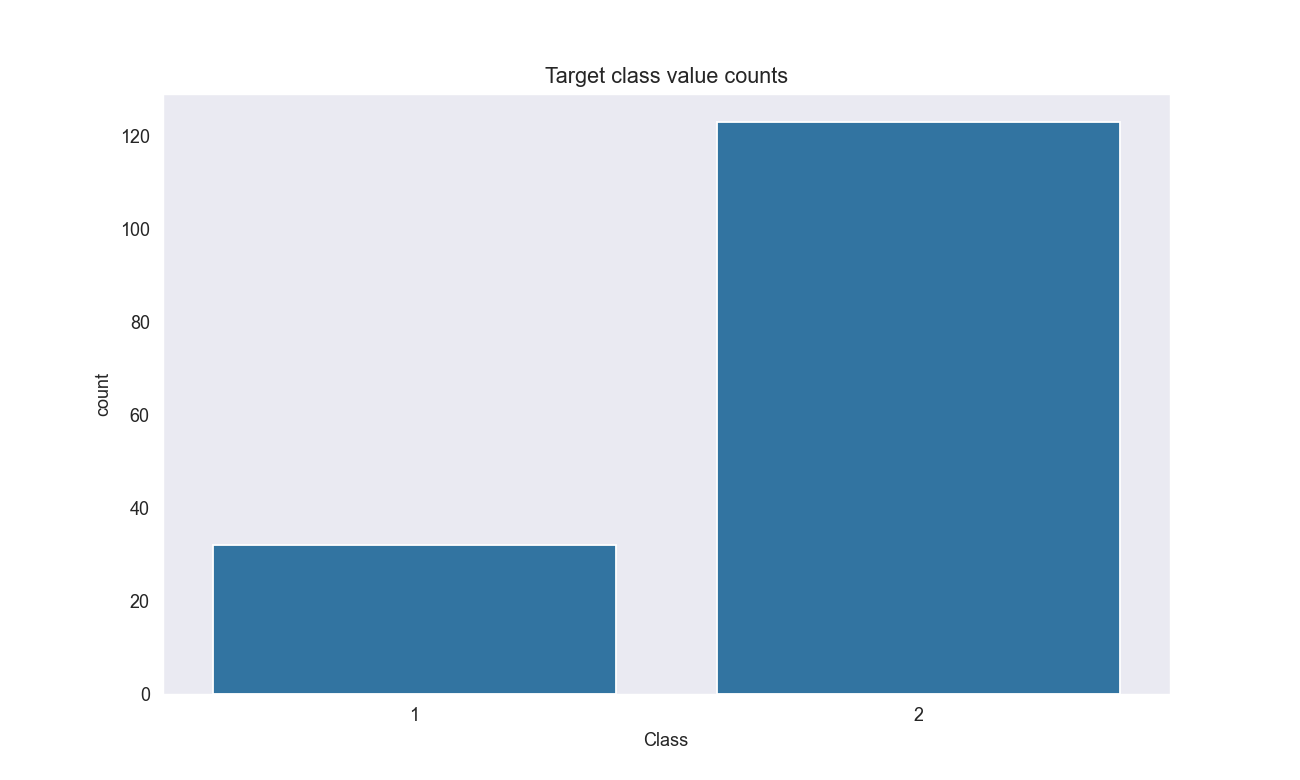

Class
2    123
1     32
Name: count, dtype: int64


In [5]:
plt.figure(figsize=(10, 6), dpi=130)
plt.grid()
sns.countplot(x=hepatitis['Class'])
plt.title("Target class value counts")
plt.show()
# plt.close()
print(hepatitis['Class'].value_counts())

In [6]:
plt.close()
hepatitis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Class            155 non-null    int64 
 1   Age              155 non-null    int64 
 2   Sex              155 non-null    int64 
 3   Steroid          155 non-null    object
 4   Antivirals       155 non-null    int64 
 5   Fatigue          155 non-null    object
 6   Malaise          155 non-null    object
 7   Anorexia         155 non-null    object
 8   Liver Big        155 non-null    object
 9   Liver Firm       155 non-null    object
 10  Spleen Palpable  155 non-null    object
 11  Spiders          155 non-null    object
 12  Ascites          155 non-null    object
 13  Varices          155 non-null    object
 14  Bilirubin        155 non-null    object
 15  Alk Phosphate    155 non-null    object
 16  Sgot             155 non-null    object
 17  Albumin          155 non-null    ob

In [7]:
hepatitis.describe()

,Class,Age,Sex,Antivirals,Histology
count,155.000000,155.000000,155.000000,155.000000,155.000000
mean,1.793548,41.200000,1.103226,1.845161,1.451613
std,0.406070,12.565878,0.305240,0.362923,0.499266
min,1.000000,7.000000,1.000000,1.000000,1.000000
25%,2.000000,32.000000,1.000000,2.000000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000


# Замена пропущенных значений средними

In [8]:
Bilirubin = hepatitis['Bilirubin']
bilirubin_mean = round(Bilirubin[Bilirubin != '?'].astype(float).mean(), 2)
print('Bilirubin mean = ', bilirubin_mean)

Alk_Phosphate = hepatitis['Alk Phosphate']
Alk_Phosphate_mean = Alk_Phosphate[Alk_Phosphate != '?'].astype(int).mean().astype(int)
print('Alk_Phosphate mean = ', Alk_Phosphate_mean)

Sgot = hepatitis['Sgot']
Sgot_mean = Sgot[Sgot != '?'].astype(int).mean().astype(int)
print('Sgot mean = ', Sgot_mean)

Albumin = hepatitis['Albumin']
Albumin_mean = round(Albumin[Albumin != '?'].astype(float).mean(), 1)
print('Albumin mean = ', Albumin_mean)

Protime = hepatitis['Protime']
Protime_mean = Protime[Protime != '?'].astype(int).mean().astype(int)
print('Protime mean = ', Protime_mean)

hepatitis = hepatitis.replace(
    {'Steroid': {'?': 3}, 'Fatigue': {'?': 3}, 'Malaise': {'?': 3}, 'Anorexia': {'?': 3}, 'Liver Big': {'?': 3},
     'Liver Firm': {'?': 3}, 'Spleen Palpable': {'?': 3}, 'Spiders': {'?': 3}, 'Ascites': {'?': 3}, 'Varices': {'?': 3},
     'Bilirubin': {'?': bilirubin_mean}, 'Alk Phosphate': {'?': Alk_Phosphate_mean}, 'Sgot': {'?': Sgot_mean},
     'Albumin': {'?': Albumin_mean}, 'Protime': {'?': Protime_mean}})
hepatitis

Bilirubin mean =  1.43
Alk_Phosphate mean =  105
Sgot mean =  85
Albumin mean =  3.8
Protime mean =  61


,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,61,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,61,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,61,1
3,2,31,1,3,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,105,200,4.0,61,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,105,242,3.3,50,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,61,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,61,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2


In [9]:
for column in hepatitis.columns:
    if column not in ['Bilirubin', 'Albumin']:
        hepatitis[column] = hepatitis[column].astype('int')
    else:
        hepatitis[column] = hepatitis[column].astype('float')
hepatitis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Class            155 non-null    int64  
 1   Age              155 non-null    int64  
 2   Sex              155 non-null    int64  
 3   Steroid          155 non-null    int64  
 4   Antivirals       155 non-null    int64  
 5   Fatigue          155 non-null    int64  
 6   Malaise          155 non-null    int64  
 7   Anorexia         155 non-null    int64  
 8   Liver Big        155 non-null    int64  
 9   Liver Firm       155 non-null    int64  
 10  Spleen Palpable  155 non-null    int64  
 11  Spiders          155 non-null    int64  
 12  Ascites          155 non-null    int64  
 13  Varices          155 non-null    int64  
 14  Bilirubin        155 non-null    float64
 15  Alk Phosphate    155 non-null    int64  
 16  Sgot             155 non-null    int64  
 17  Albumin         

In [10]:
hepatitis

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,61,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,61,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,61,1
3,2,31,1,3,1,2,2,2,2,2,2,2,2,2,0.7,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,105,200,4.0,61,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.6,105,242,3.3,50,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.9,126,142,4.3,61,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.8,75,20,4.1,61,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.5,81,19,4.1,48,2


# Разделение на обучающую и тестовую выборки

In [11]:
hepatitis_features = hepatitis.iloc[:, 1:]
hepatitis_targets = hepatitis.iloc[:, 0]
X = hepatitis.iloc[:, 1:]  # hepatitis_features
y = hepatitis.iloc[:, 0]  # hepatitis_targets

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Нормируем данные

In [13]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

# SVM 

{'C': 1.5, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1.5, gamma=0.1)
              precision    recall  f1-score   support

           1       0.67      0.50      0.57         4
           2       0.85      0.92      0.88        12

    accuracy                           0.81        16
   macro avg       0.76      0.71      0.73        16
weighted avg       0.80      0.81      0.80        16



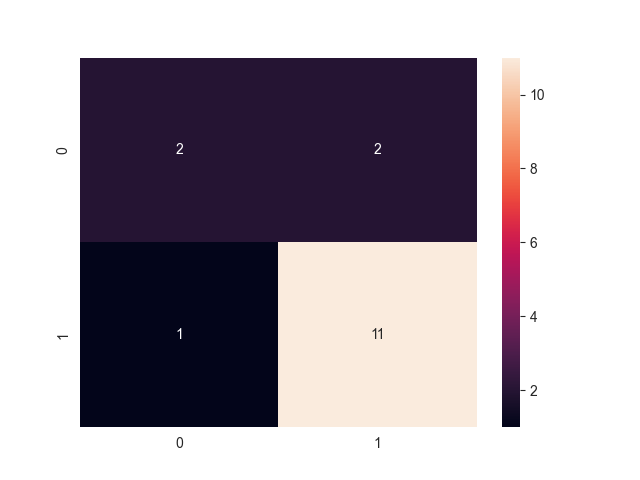

In [14]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# classifier = SVC(kernel='linear')
# classifier.fit(X_train, y_train)
param_grid = {'C': [0.1, 1, 1.5, 2.5, 5, 10, 100, 1000],
              'gamma': [1, 0.1, 0.15, 0.01, 0.05, 0.001, 0.0001],
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(), param_grid, verbose=False, scoring='accuracy')  # refit = True
grid.fit(X_train, y_train)
# выводим лучшие параметры
print(grid.best_params_)
print(grid.best_estimator_)
# применяем на тестовых данных
classifier = grid.best_estimator_
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=grid.classes_)
sns.heatmap(cm, annot=True)
# plt.savefig('confusion_svm.png')
_ = plt.show()


In [15]:
plt.close()
plt.show()

In [46]:
from sklearn.inspection import DecisionBoundaryDisplay
def plot_training_data_with_decision_boundary(clf, X, y):
    # clf = SVC(**clf_params).fit(X, y)
    # clf = SVC(kernel=kernel).fit(X, y)
    clf.fit(X,y)
    # Settings for plotting
    x_min = np.min(X[0])
    x_max = np.max(X[0])
    y_min = np.min(X[1])
    y_max = np.max(X[1])
    figsize_x = abs(x_max - x_min)
    figsize_y = abs(y_max - y_min)
    _, ax = plt.subplots(figsize=(10, 10))
    # x_min, x_max, y_min, y_max = 10, 17, -7, 2
    # ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

    # Plot decision boundary and margins
    common_params = {"estimator": clf, "X": X, "ax": ax}
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="predict",
        plot_method="pcolormesh",
        alpha=0.3,
    )
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="decision_function",
        plot_method="contour",
        levels=[-1, 0, 1],
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
    )

    # Plot bigger circles around samples that serve as support vectors
    ax.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=250,
        facecolors="none",
        edgecolors="k",
    )
    # Plot samples by color and add legend
    # scatter = ax.scatter(X[:, 0], X[:, 1], s=150, c=y, label=y, edgecolors="k")
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, s=150, edgecolors="k")
    ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
    ax.set_title(f"Decision boundaries")

    _ = plt.show()
    return None

In [47]:
def plot_training_data_before_classification(X, y):
    _, ax = plt.subplots(figsize=(10, 10))
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, s=150, edgecolors="k")
    ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
    ax.set_title(f"Training data before classification")
    _ = plt.show()

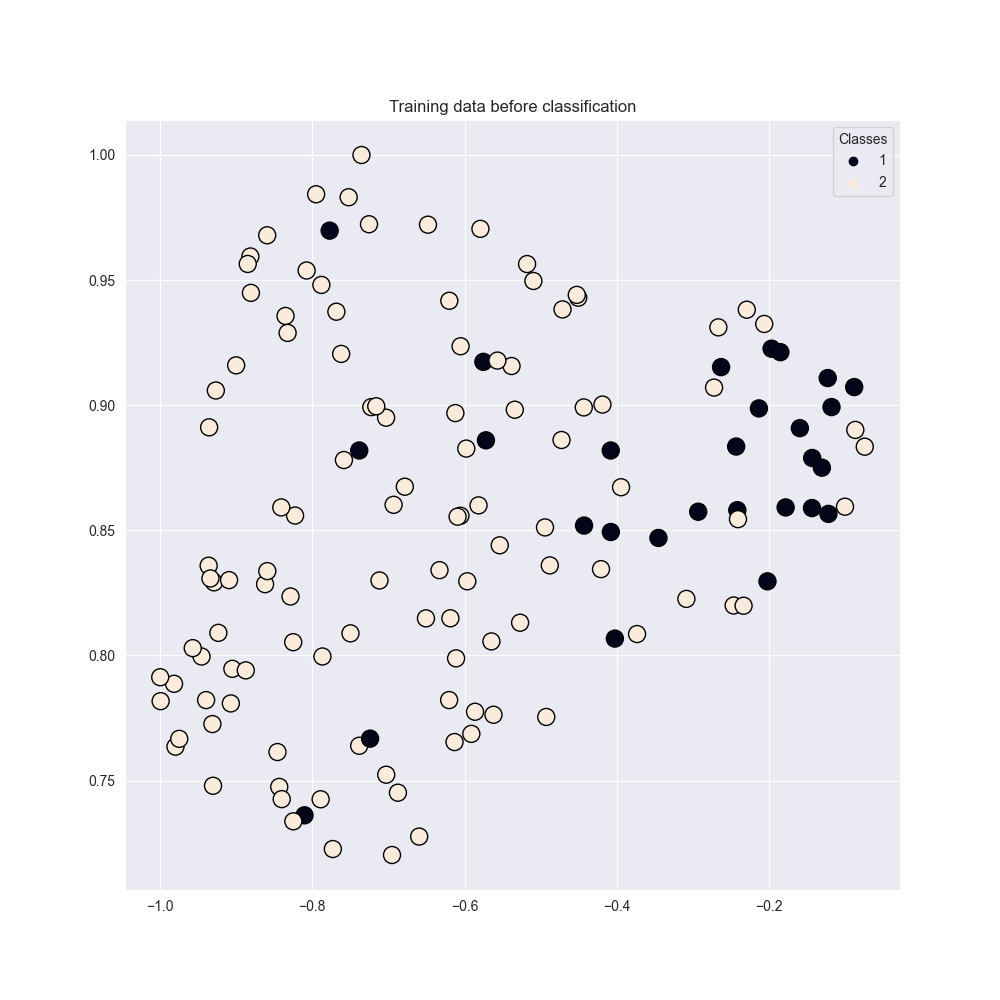

In [48]:
plt.close()
X_reduced = UMAP().fit_transform(X_train)
X_2_scaled = MaxAbsScaler().fit_transform(X_reduced)
plot_training_data_before_classification(X_2_scaled, y_train)

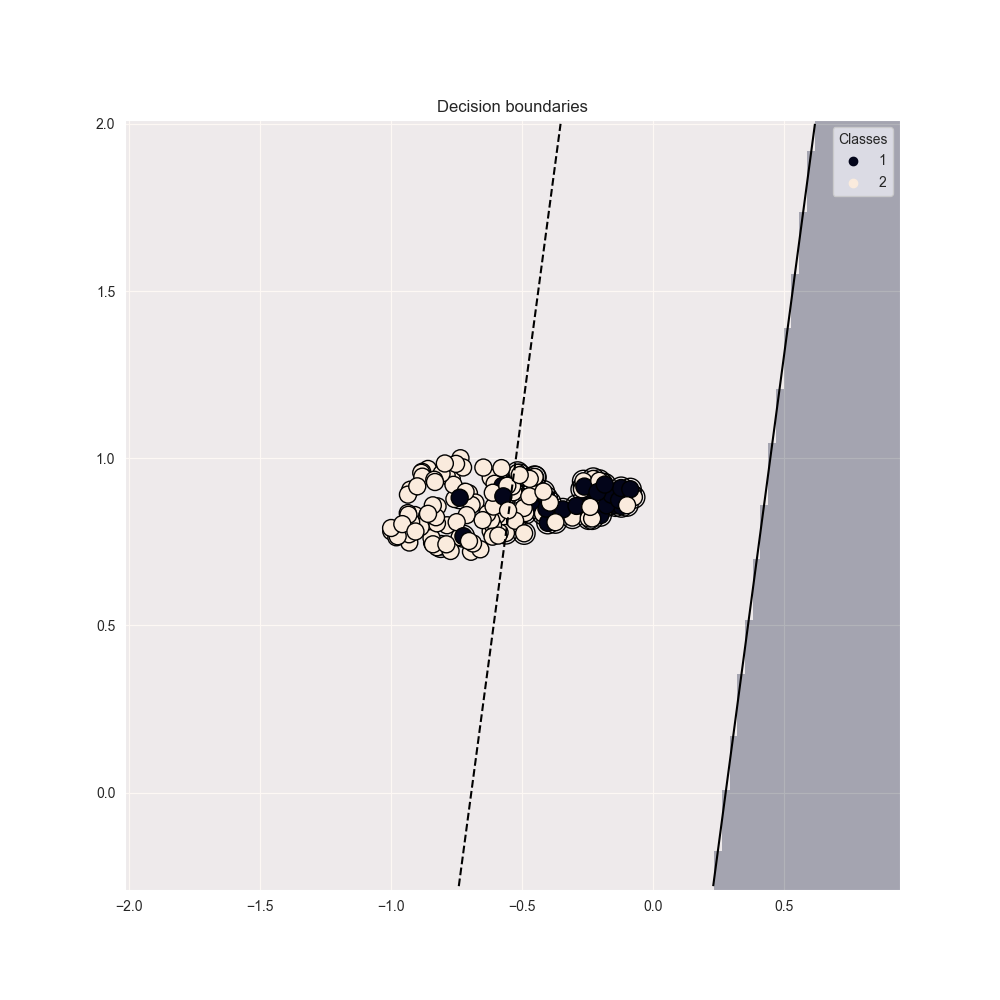

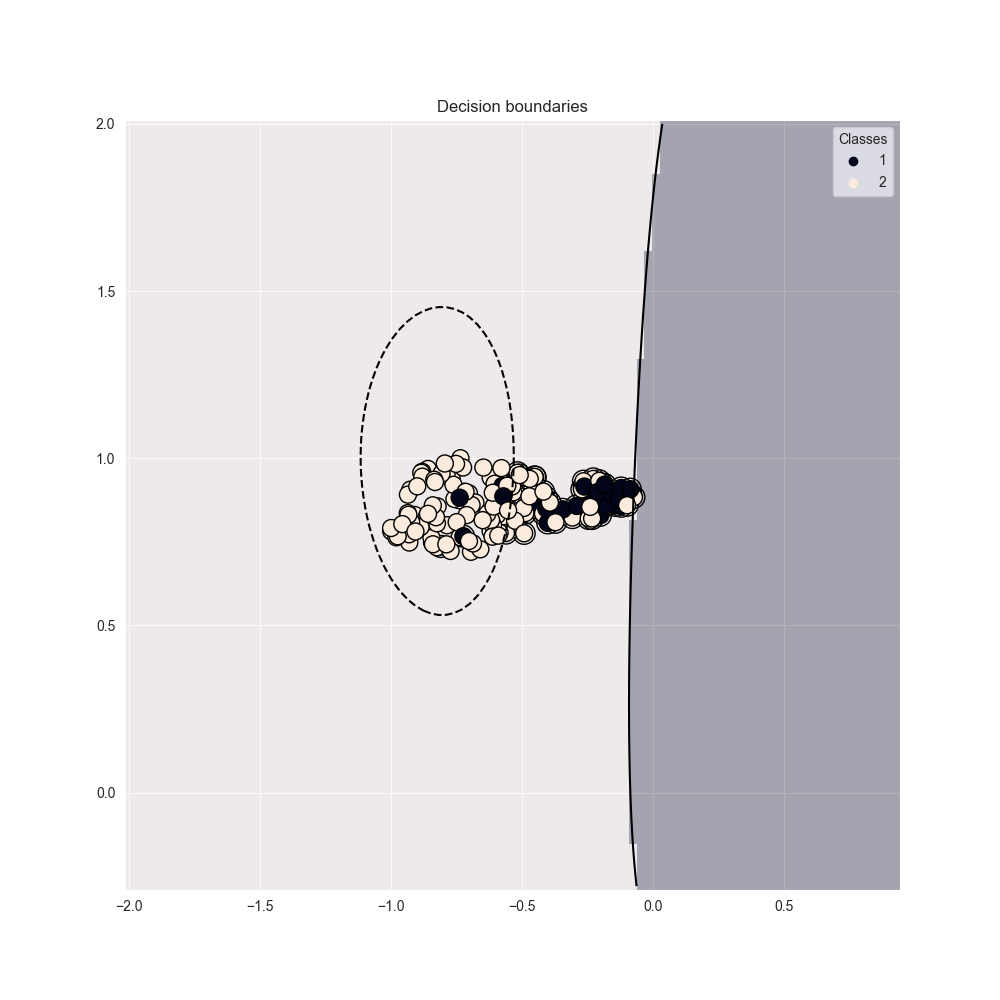

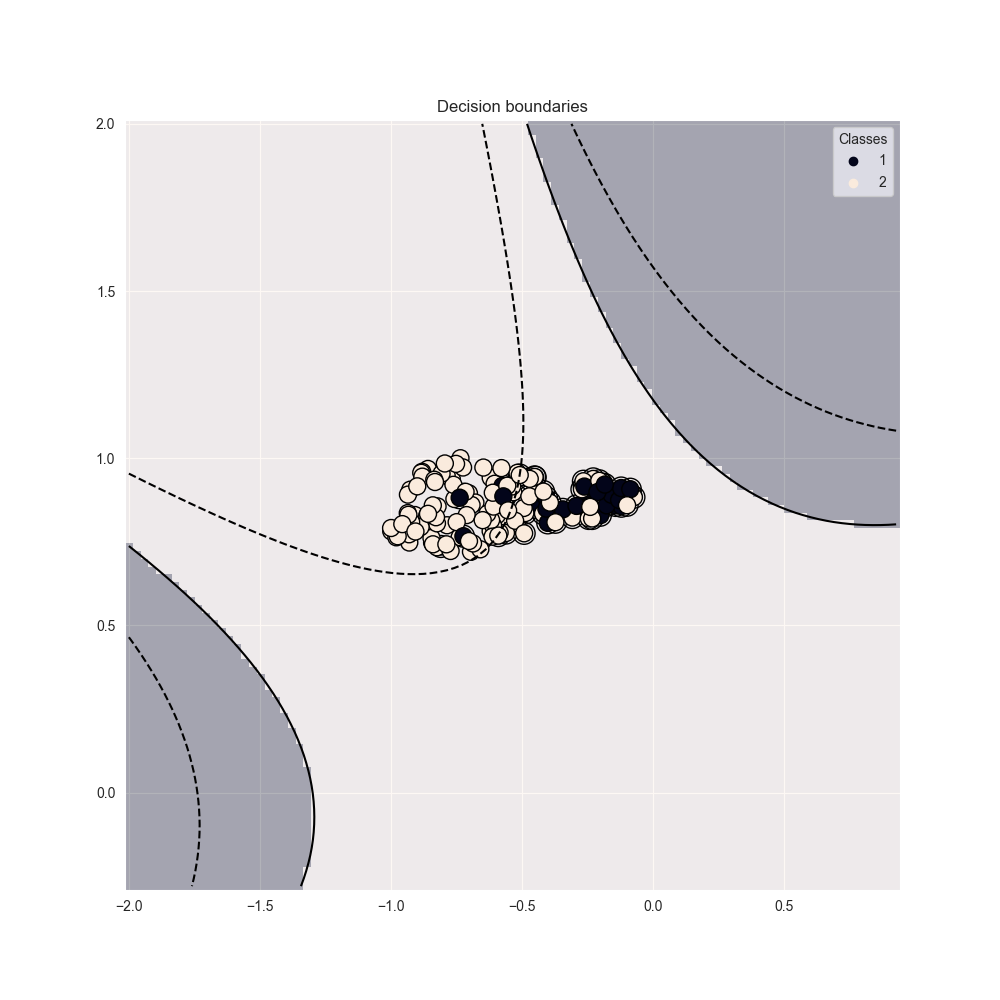

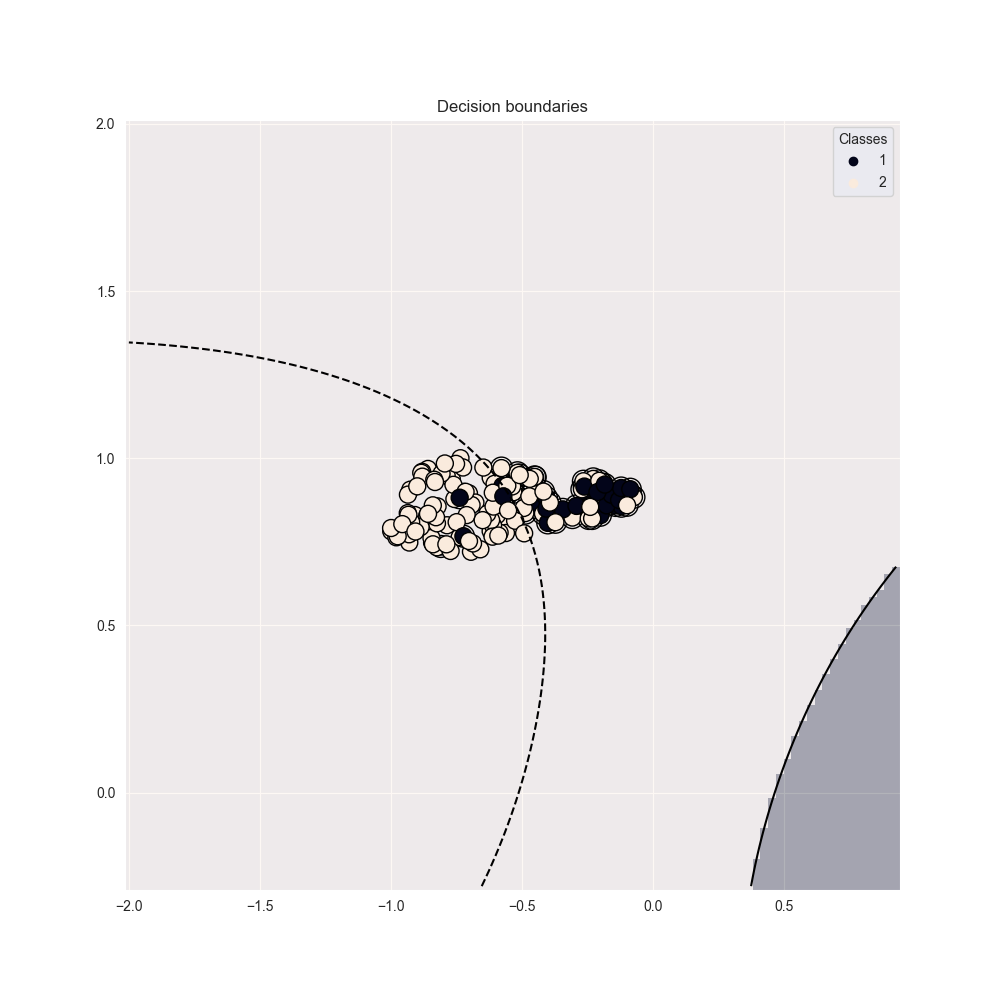

In [49]:
plt.close()
umap_kwargs = {}
# X_reduced = UMAP(**umap_kwargs).fit_transform(X_train)
# print(MaxAbsScaler().fit_transform(X_reduced))
# X_2_scaled = MaxAbsScaler().fit_transform(X_reduced)
# plot_training_data_with_decision_boundary('rbf', X_2_scaled, y_train)
# X_2_scaled = MaxAbsScaler().fit_transform(X_reduced)
for kernel in ['linear','rbf','poly','sigmoid']:
    clf = SVC(kernel=kernel)
    plot_training_data_with_decision_boundary(clf, X_2_scaled, y_train)
    plt.close()
# plot_training_data_with_decision_boundary(classifier,X_reduced, y_train)
# for kernel in ['linear','rbf','poly','sigmoid']:
#     for scaler in [MaxAbsScaler,
#     MinMaxScaler,
#     Normalizer,
#     PowerTransformer,
#     QuantileTransformer,
#     RobustScaler,
#     StandardScaler,
#     minmax_scale]:
#         X_2_scaled = scaler().fit_transform(X_reduced)
#         plot_training_data_with_decision_boundary(grid.best_params_, X_2_scaled, y_train)

0.8125
              precision    recall  f1-score   support

           1       0.67      0.50      0.57         4
           2       0.85      0.92      0.88        12

    accuracy                           0.81        16
   macro avg       0.76      0.71      0.73        16
weighted avg       0.80      0.81      0.80        16



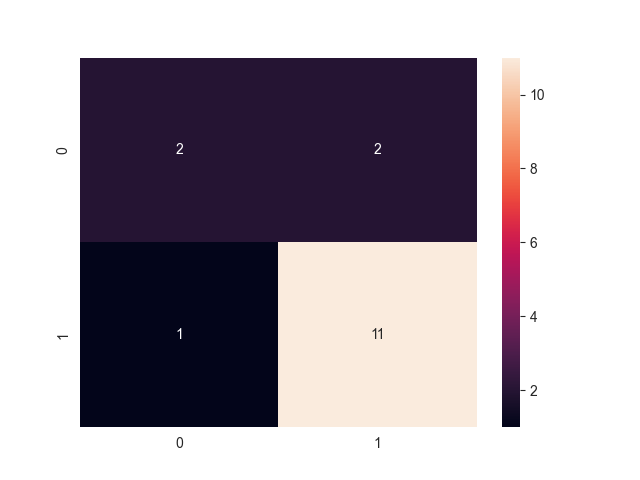

In [50]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
sns.heatmap(cm, annot=True)
plt.savefig('confusion.png')
print(classification_report(y_test, y_pred))
plt.show()

# KNN

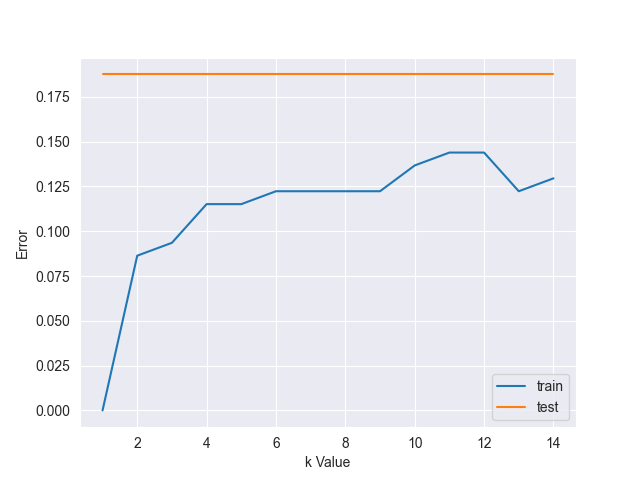

In [51]:
from sklearn.neighbors import KNeighborsClassifier
# Определение оптимального числа соседей
plt.close()
error1= []
error2= []
# for loop 
for k in range(1,15):
    # using KNN algorithm
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred1 = knn.predict(X_train)
    # stroring the errors
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2 = knn.predict(X_test)
    error2.append(np.mean(y_test != y_pred2))
# ploting the graphs for testing and training 
plt.plot(range(1,15), error1, label="train")
plt.plot(range(1,15), error2, label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()
# plt.imshow(img.reshape((28, 28)))
plt.show(block=True)
# plt.close()
# k = 4  - оптимум на тестовых данных

0.8125
              precision    recall  f1-score   support

           1       0.67      0.50      0.57         4
           2       0.85      0.92      0.88        12

    accuracy                           0.81        16
   macro avg       0.76      0.71      0.73        16
weighted avg       0.80      0.81      0.80        16



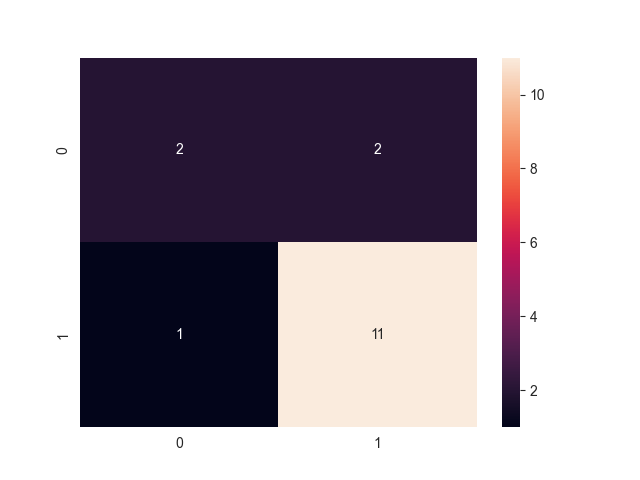

In [52]:
plt.close()
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
sns.heatmap(cm, annot=True)
plt.savefig('confusion_knn.png')
print(classification_report(y_test, y_pred))
plt.show()

# GridSearch KNN

In [53]:
plt.close()
estimator_KNN = KNeighborsClassifier()
parameters_KNN = {
    'n_neighbors': (1,2, 3,5),
    'leaf_size': (10,20,30),
    'p': (1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev'),
    'algorithm': ('auto', 'ball_tree','kd_tree', 'brute')}
                   
# with GridSearch
grid_search_KNN = GridSearchCV(
    estimator=estimator_KNN,
    param_grid=parameters_KNN,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5
)
best_knn = grid_search_KNN.fit(X_train, y_train)
print(best_knn.best_params_)
print(best_knn.best_estimator_)

{'algorithm': 'ball_tree', 'leaf_size': 10, 'metric': 'chebyshev', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, metric='chebyshev',
                     n_neighbors=3, p=1)


D:\Artem\Magistrature\1_sem\intellg_systems_and_techno\labs\.venv\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


0.75
              precision    recall  f1-score   support

           1       0.50      0.25      0.33         4
           2       0.79      0.92      0.85        12

    accuracy                           0.75        16
   macro avg       0.64      0.58      0.59        16
weighted avg       0.71      0.75      0.72        16



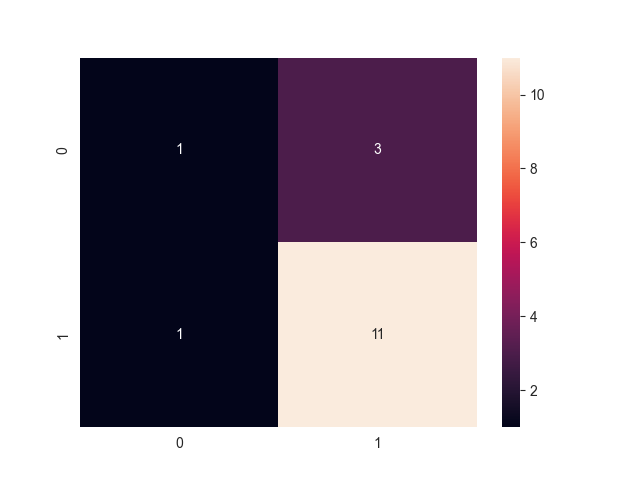

In [54]:
y_pred  = best_knn.best_estimator_.predict(X_test)
print(accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
sns.heatmap(cm, annot=True)
plt.savefig('best_knn.png')
print(classification_report(y_test, y_pred))
plt.show()

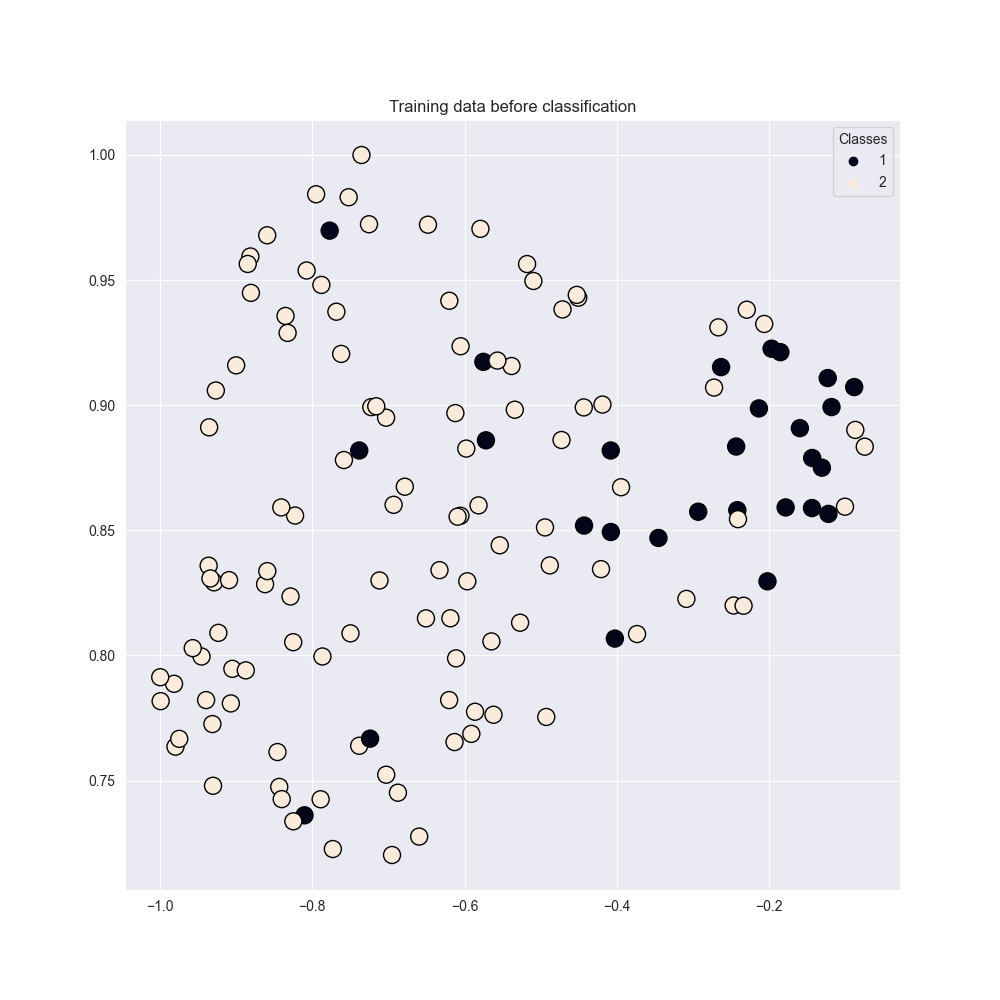

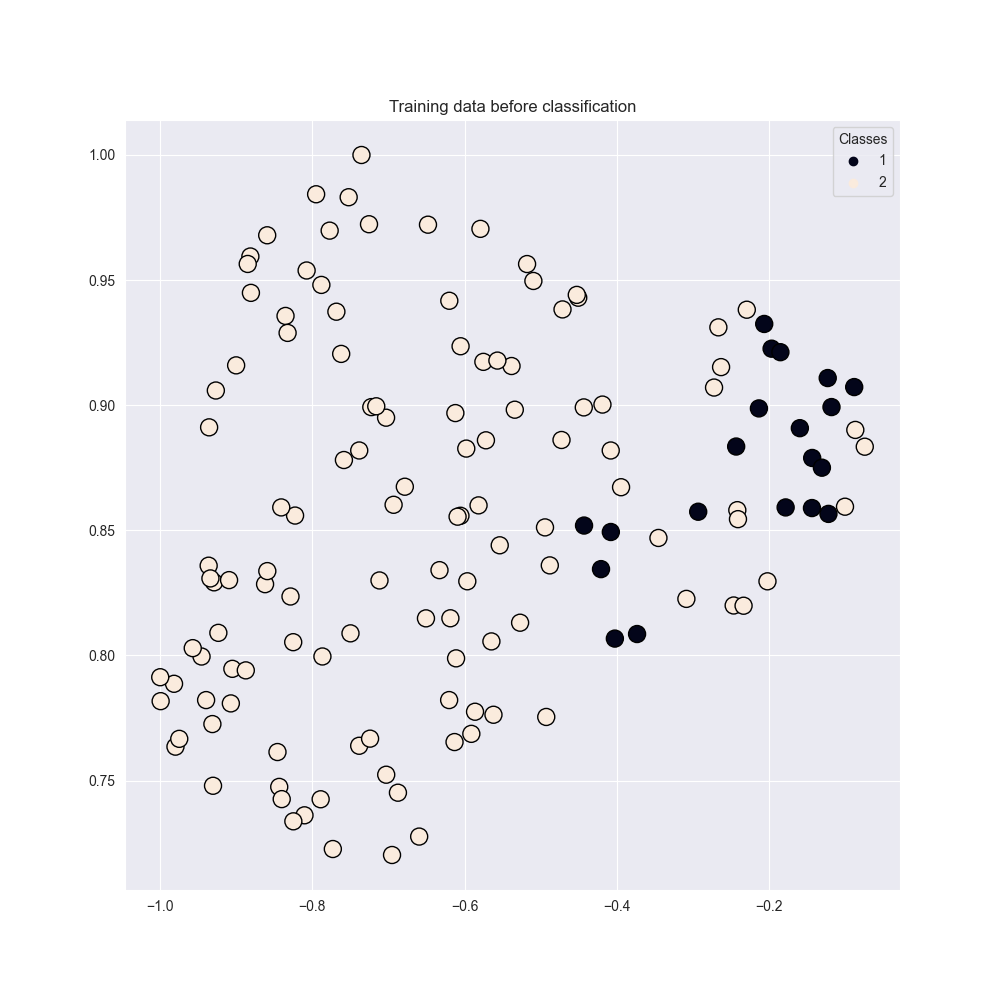

In [58]:
plot_training_data_before_classification(X_2_scaled, y_train)
y_pred  = KNeighborsClassifier().fit(X_2_scaled,y_train).predict(X_2_scaled)
plot_training_data_before_classification(X_2_scaled,y_pred)

In [84]:
import plotly.express as px
# Load and split data

# Fit the model on training data, predict on test data
# clf = KNeighborsClassifier(15)
# clf.fit(X_train, y_train)
# y_score = clf.predict_proba(X_test)[:, 1]
y_score   = KNeighborsClassifier().fit(X_2_scaled,y_train).predict(X_2_scaled)

fig_knn = px.scatter(
    X_2_scaled, x=0, y=1,
    color=y_score, color_continuous_scale='RdBu',
    symbol=y_train, symbol_map={'0': 'square-dot', '1': 'circle-dot'},
    labels={'symbol': 'label', 'color': 'score of  first class'}
)
fig_knn.update_traces(marker_size=12, marker_line_width=1.5)
fig_knn.update_layout(legend_orientation='h')
fig_knn.show()

# Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
display(rfc.score(X_train, y_train))

1.0

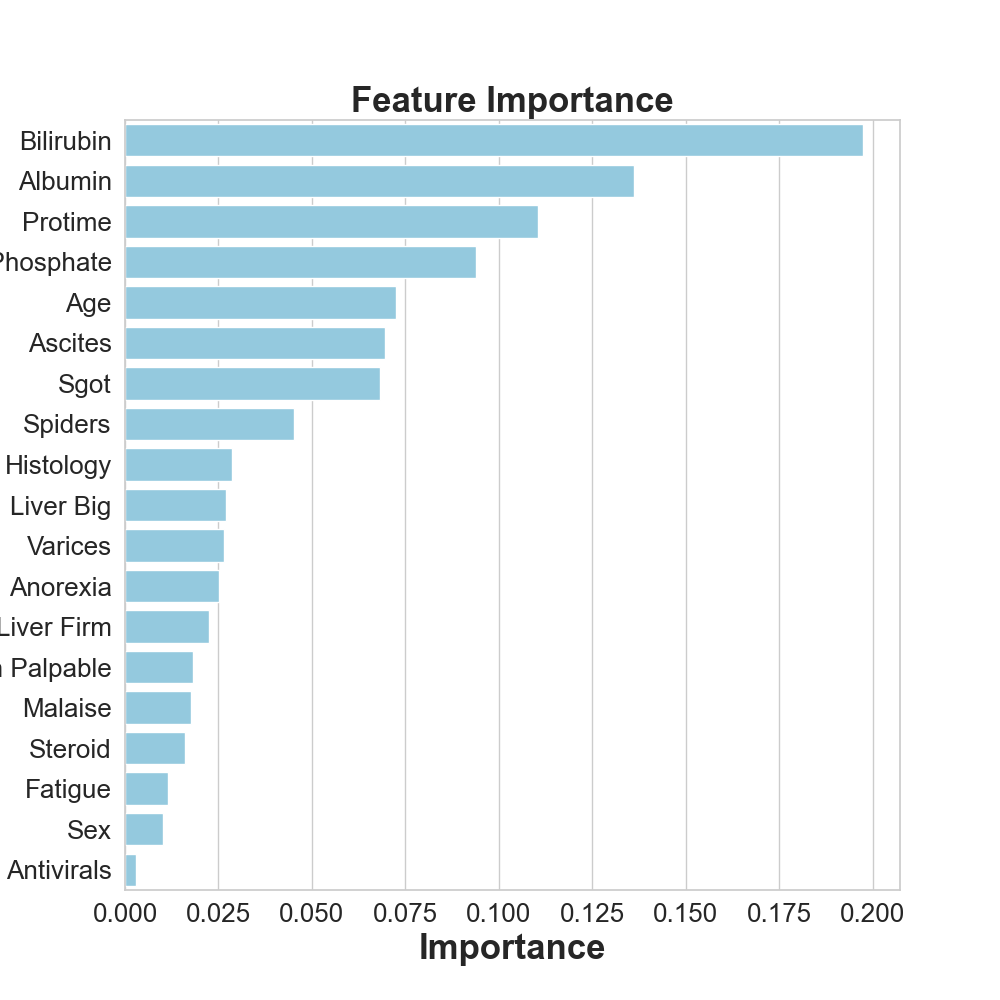

None

,Features,Gini-Importance
0,Bilirubin,0.197425
1,Albumin,0.136193
2,Protime,0.110544
3,Alk Phosphate,0.093881
4,Age,0.072597
5,Ascites,0.069568
6,Sgot,0.068098
7,Spiders,0.045173
8,Histology,0.028752
9,Liver Big,0.027141


In [61]:
feats = {}
for feature, importance in zip(hepatitis_features, rfc.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

0.9375
              precision    recall  f1-score   support

           1       1.00      0.75      0.86         4
           2       0.92      1.00      0.96        12

    accuracy                           0.94        16
   macro avg       0.96      0.88      0.91        16
weighted avg       0.94      0.94      0.93        16



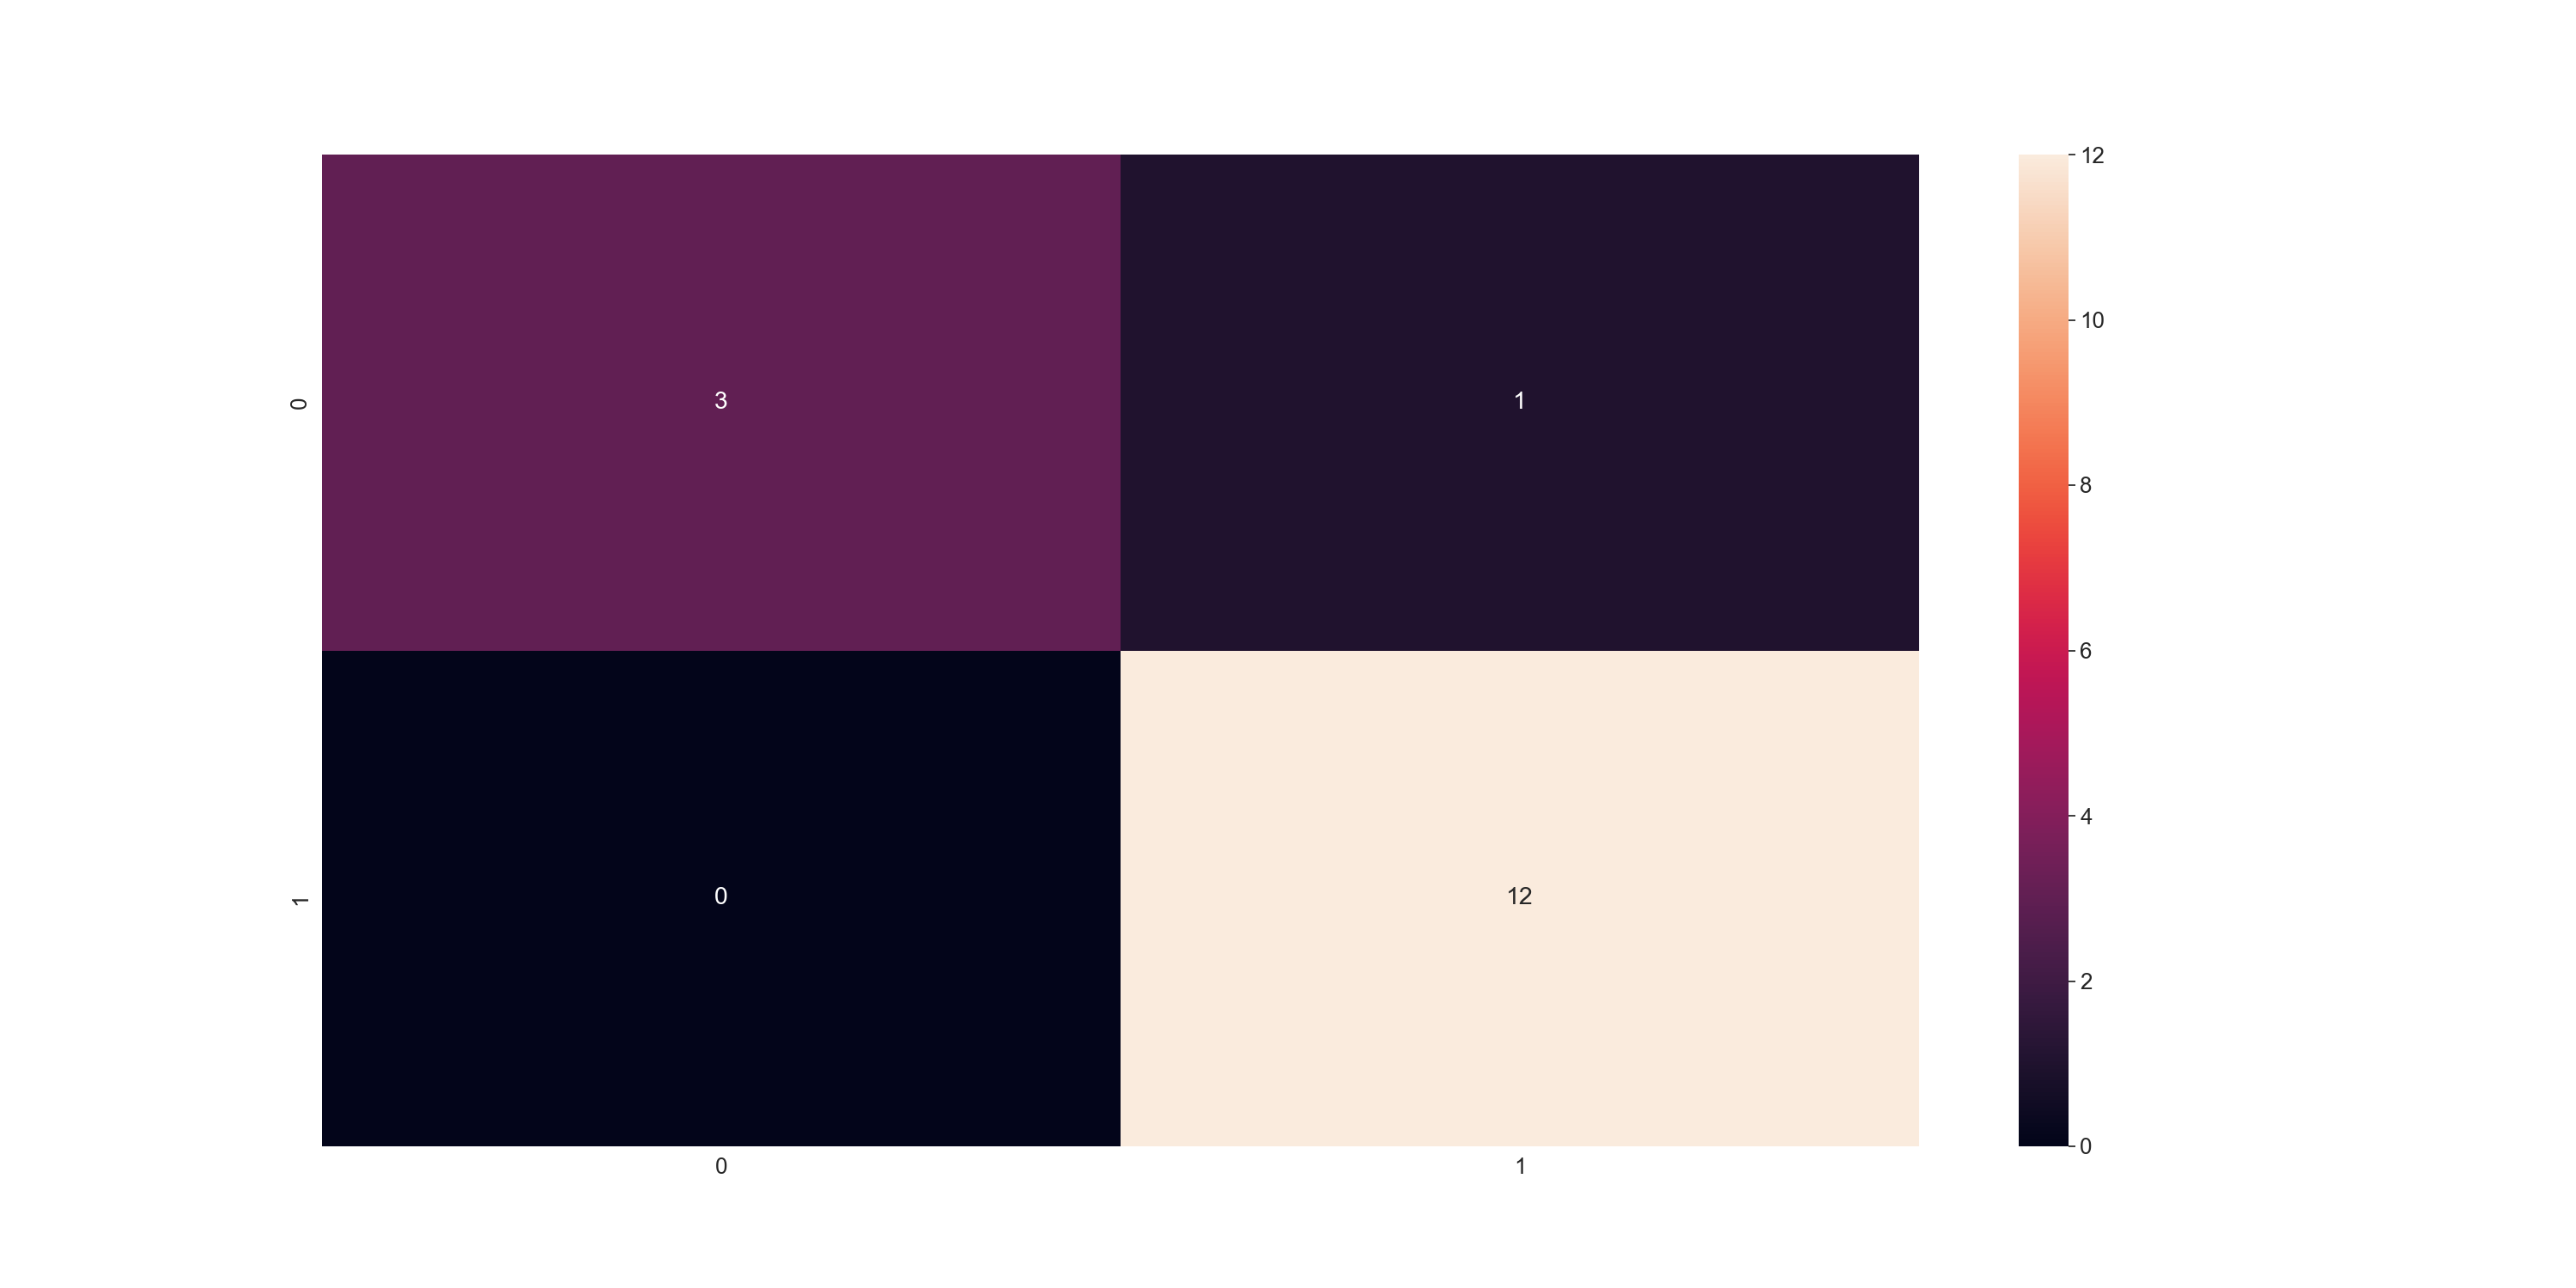

In [67]:
y_pred  = rfc.predict(X_test)
print(accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=rfc.classes_)
sns.heatmap(cm, annot=True)
# plt.savefig('best_knn.png')
print(classification_report(y_test, y_pred))
plt.show()


In [71]:
n_estimators = [1,2,3,10]
max_features = ['sqrt']
max_depth = [2,3,7,11,15,None]
min_samples_split = [2,3,4,22,23,24]
min_samples_leaf = [2,3,4,5,6,7]
bootstrap = [True,False]
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
gs = GridSearchCV(rfc, param_grid, cv = 3, verbose = 1, n_jobs=-1)
gs.fit(X_train, y_train)
rfc = gs.best_estimator_
print(gs.best_estimator_)
print(gs.best_params_)


Fitting 3 folds for each of 1728 candidates, totalling 5184 fits


{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 10}

In [72]:
y_pred  = rfc.predict(X_test)
print(accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=rfc.classes_)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_pred))

0.875
              precision    recall  f1-score   support

           1       1.00      0.50      0.67         4
           2       0.86      1.00      0.92        12

    accuracy                           0.88        16
   macro avg       0.93      0.75      0.79        16
weighted avg       0.89      0.88      0.86        16



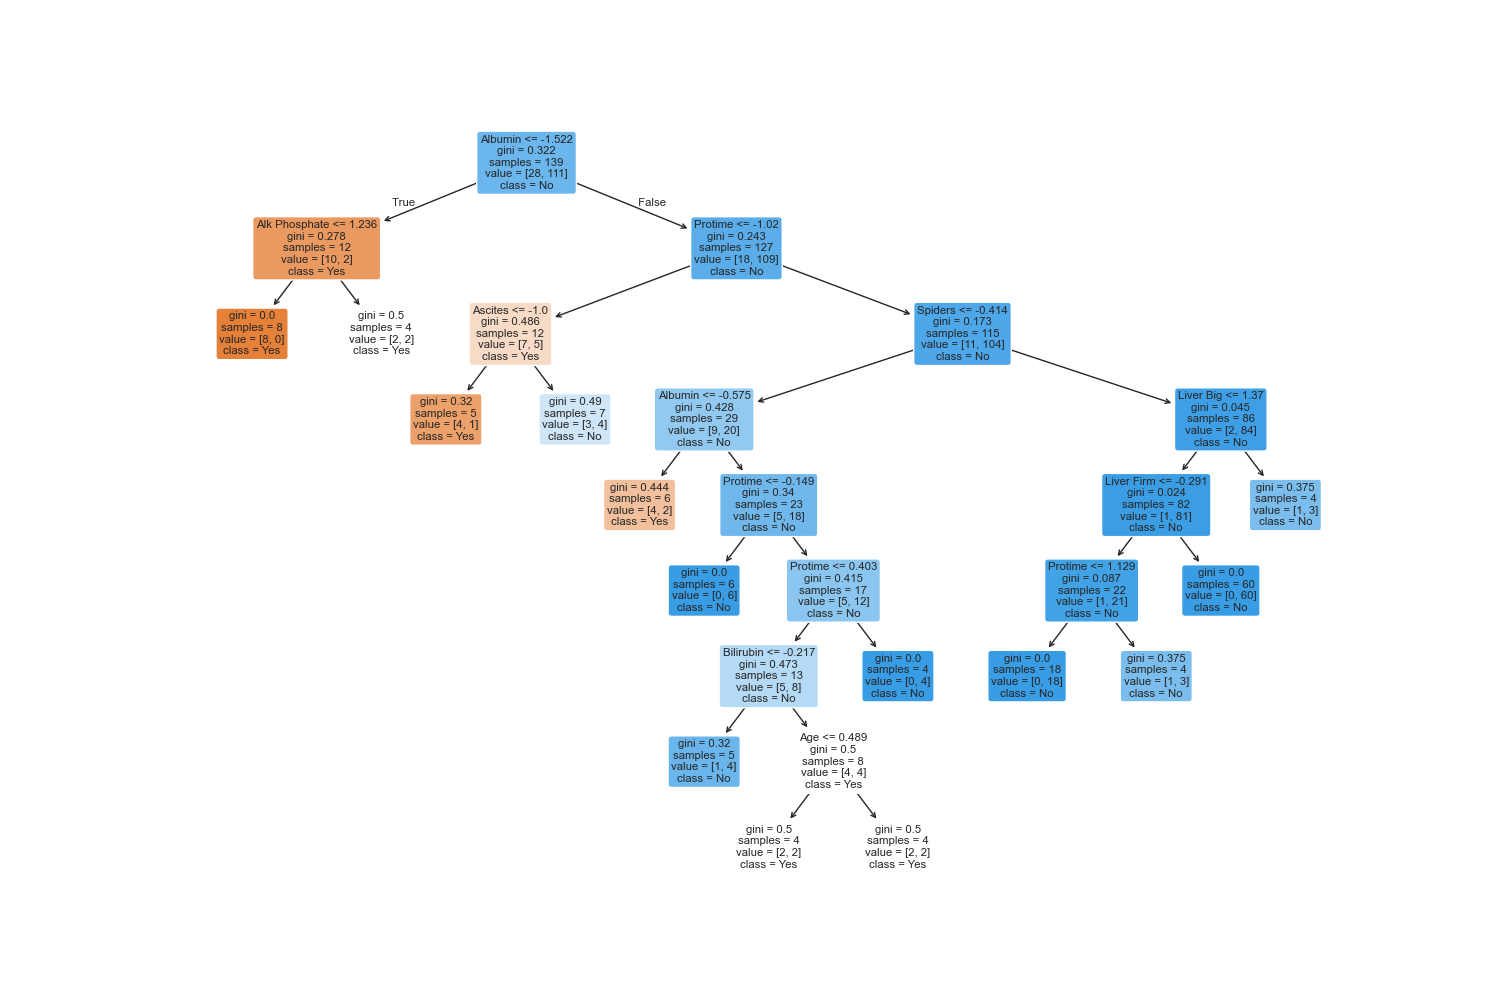

In [76]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(15, 10))
plot_tree(rfc[0], 
          feature_names=hepatitis_features.columns,
          class_names=['Yes','No'], 
          filled=True, rounded=True)

plt.show()